<a href="https://colab.research.google.com/github/Satya-Prakash009/EDA-playstore-project/blob/main/EDA_Project_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>
 
## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>
 
## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

1. Google Play Store apps and reviews
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
 
path = '/content/drive/MyDrive/Colab Notebooks/Data for class/PlayStoreData.csv'
play_df = pd.read_csv(path)
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_df.head()

In [ ]:
play_df.tail()

In [ ]:
play_df.describe()

**2. Data cleaning**

**Data Preparation and Cleaning**
Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data.

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [3]:
# removing unwanted columns which are not of much use
play_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
#boxplot to see if any outliers
play_df.boxplot()


In [ ]:
# checking for rating more than 5
play_df[play_df.Rating > 5]

In [6]:
#removing the row
play_df.drop([10472], inplace=True)

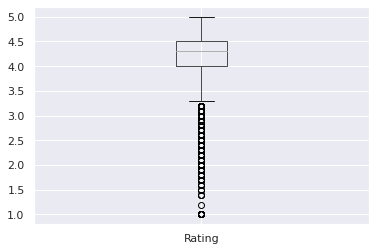

In [7]:
# boxplot to check if rating column ok
play_df.boxplot()

In [ ]:
#finding sum of missing values in dataset
play_df.isnull().sum()

In [9]:
# if rating column has Nan values, it is replaced by median value
play_df['Rating'].fillna(value=play_df['Rating'].median(), inplace=True)

In [ ]:
# checking for any more Null values
play_df.isnull().sum()

In [ ]:
# checking for Null value in type column
play_df[play_df['Type'].isnull()]

In [12]:
#removing the row
play_df.drop([9148], inplace=True)

In [ ]:
# checking for any more Null values
play_df.isnull().sum()

In [19]:
# converting KB to MB
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace('Varies with device' , 'Nan') if 'Varies with device' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace(',' , '') if 'M' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace('M' , '') if 'M' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: float(str(x).replace('k' , '')) / 1000 if 'k' in str(x) else x)

In [32]:
# REMOVE ALL SPECIAL CHARACTERS from columns
play_df['Price'] = play_df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
play_df['Price'] = play_df['Price'].apply(lambda x: float(x))
play_df['Installs'] = play_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_df['Installs'] = play_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_df['Installs'] = play_df['Installs'].apply(lambda x: int(x))

In [ ]:
# ramdom check if snippet working
play_df[10000:10030]

In [35]:
# Converting columns to integers
play_df['Reviews'] = play_df['Reviews'].apply(lambda x: int(x))


In [ ]:
# 
play_df.describe()

# **Exploratory Analysis and Visualization**

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent the property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

In [41]:
# setting parameters of our fontsize, figure size etc
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# We see what are the top categories in the play store, which contains the highest number of apps

In [42]:
# defining x and y axis
y = play_df['Category'].value_counts().index
x = play_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

Text(0.5, 1.0, 'Top categories on Google Playstore')

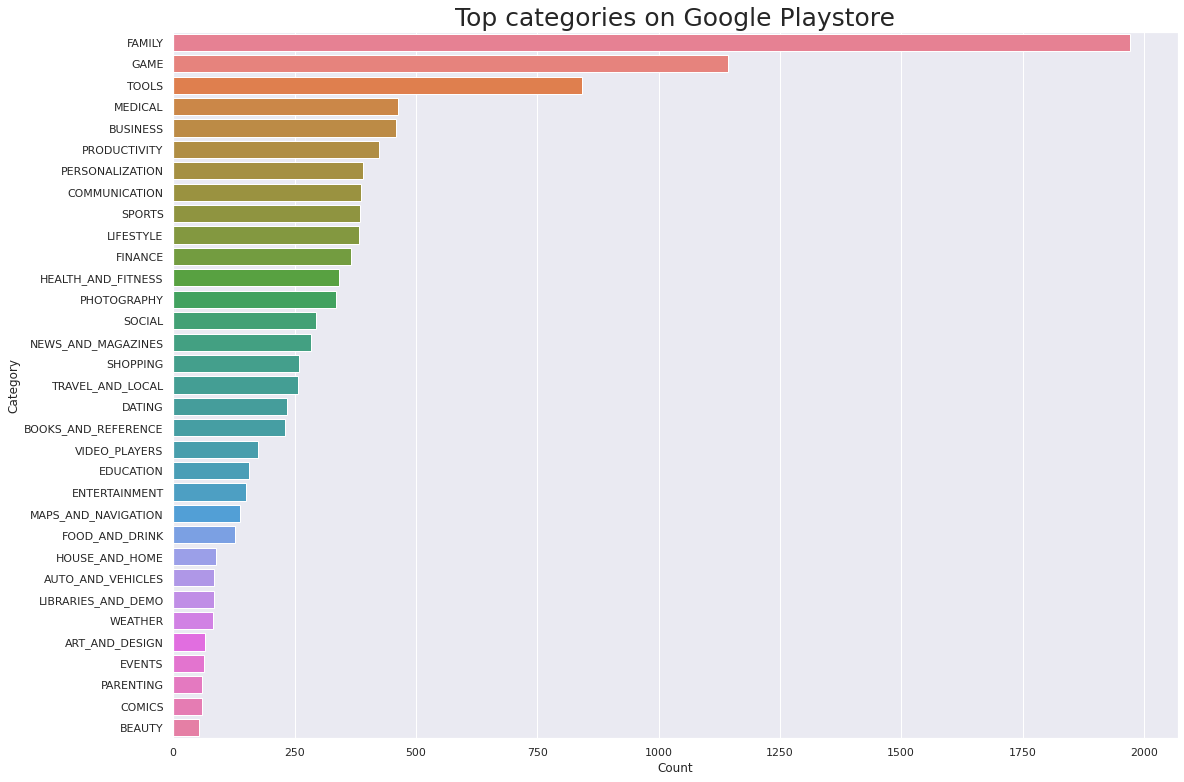

In [43]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25)

So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

In [54]:
# defining x and y axis
x2 = play_df['Content Rating'].value_counts().index
y2 = play_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

Text(0.5, 0, 'Content Rating')

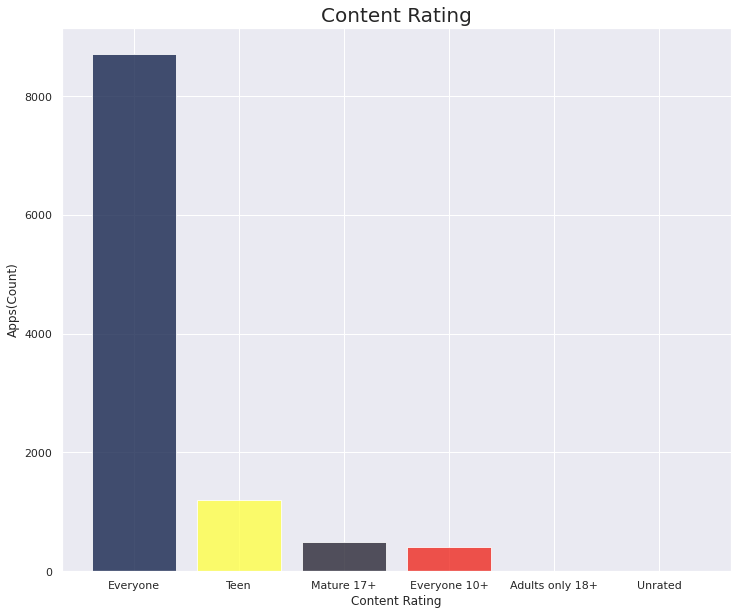

In [52]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244D','#FFFF48','#292735','#EF2920','#CD202D','#ECC5F2'], alpha=0.8)
plt.title('Content Rating',size = 20)
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')

'Everyone' has the highest number.

Let’s have a look at the distribution of the ratings of the data frame.

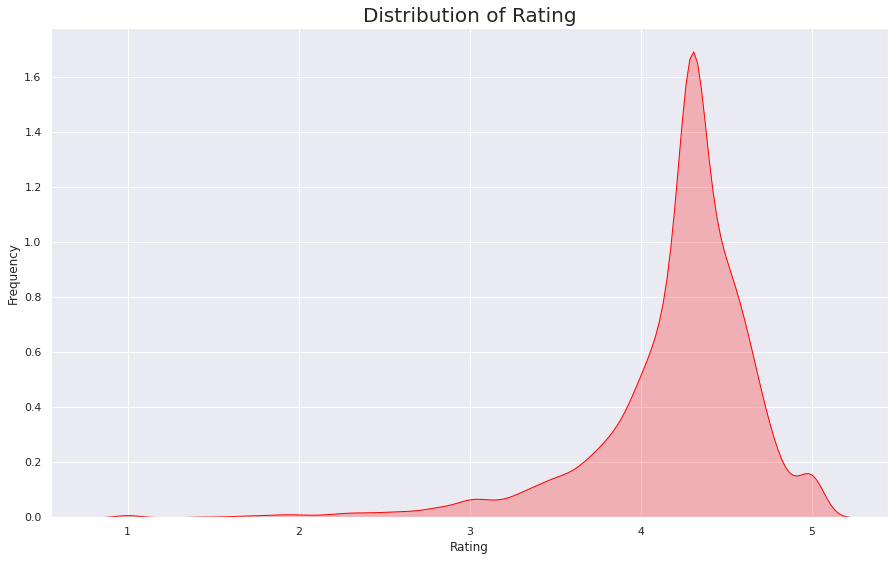

In [53]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(play_df.Rating, color="Red", shade = True)
plt.title('Distribution of Rating',size = 20);

We can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

Let’s plot a visualization graph to view what portion of the apps in the play store are paid and free.


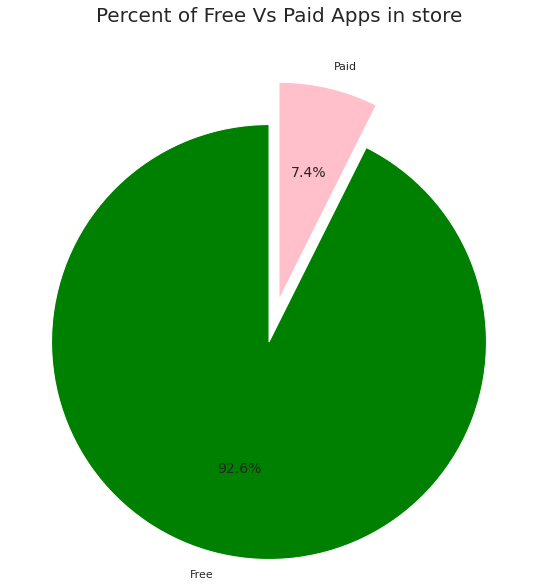

In [62]:
plt.figure(figsize=(10,10))
labels = play_df['Type'].value_counts(sort = True).index
sizes = play_df['Type'].value_counts(sort = True)
colors = ["green","pink"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [63]:
grp = play_df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.mean)
z = grp['Reviews'].agg(np.mean)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y , 'r--',color= 'blue')
plt.xticks(rotation = 90)
plt.title('Categories vs Pricing',size = 20)
plt.ylabel('Pricing')
plt.xlabel('Categories')
plt.show()

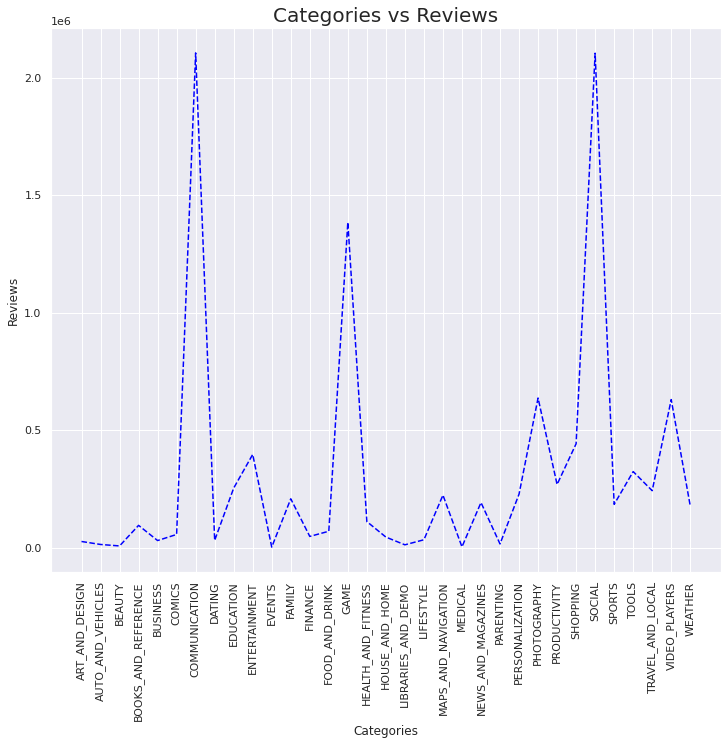

In [65]:
plt.figure(figsize=(12,10))
plt.plot(z , 'r--',color= 'blue')
plt.xticks(rotation = 90)
plt.title('Categories vs Reviews',size = 20)
plt.ylabel('Reviews')
plt.xlabel('Categories')
plt.show()